In [1]:
import librosa
import numpy as np
import soundfile as sf
from scipy.signal import butter, lfilter
from IPython.display import Audio
from matplotlib import pyplot as plt

In [2]:
x, sr = librosa.load("If.wav", sr=22050)
duration = float(len(x)) / sr
Audio(data=x, rate=sr)

In [3]:
sr_upd = 16000
step = sr/sr_upd

x_result = np.array([x[int(i*step)] for i in range(int(sr_upd*duration))])
b, a = butter(2, 0.75)
x_result = lfilter(b, a, x_result)

Audio(data=x_result, rate=sr_upd)

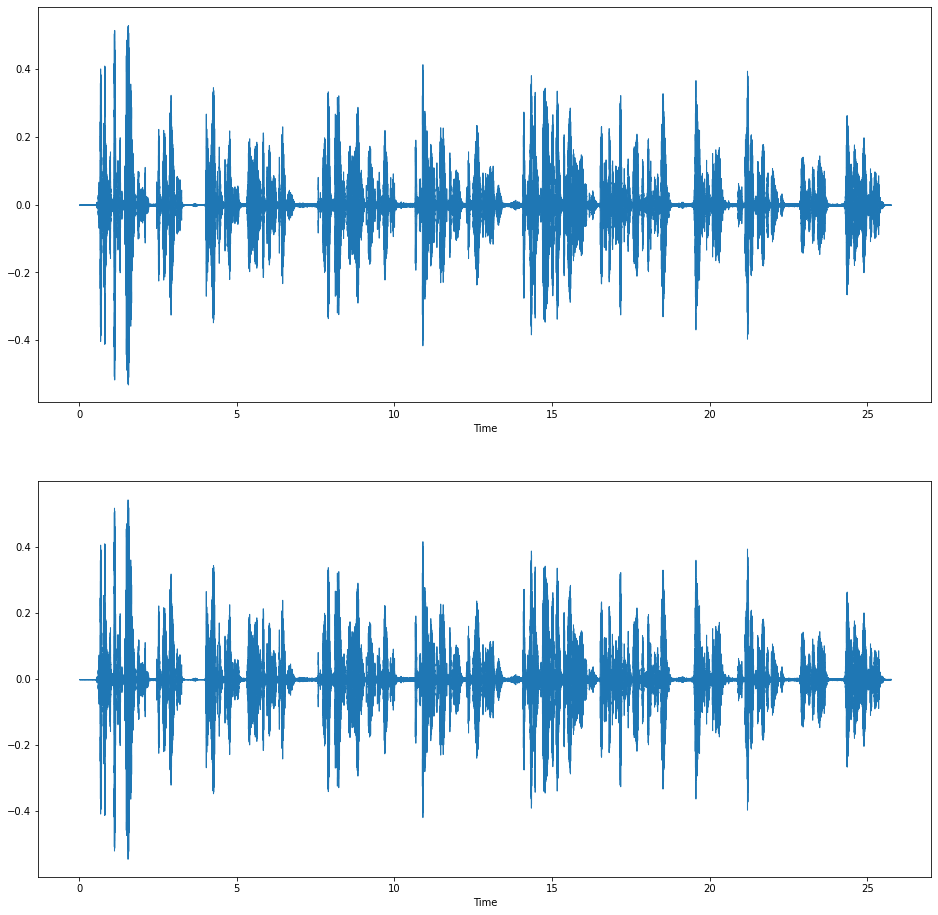

In [4]:
x_lib = librosa.resample(x, orig_sr=sr, target_sr=sr_upd)

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16,16))
librosa.display.waveshow(x_lib, sr=sr_upd, ax=ax[0])
librosa.display.waveshow(x_result, sr=sr_upd, ax=ax[1])

In [5]:
sf.write("If_16K_custom.wav", x_result, sr_upd)
sf.write("If_16K_librosa.wav", x_lib, sr_upd)